In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.signal import find_peaks, peak_widths, find_peaks_cwt

plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams.update({'font.size': 15})  # Change 14 to any desired font size
plt.rcParams.update({'figure.dpi': 600})  # Set to a very high DPI

'hello world'


'hello world'

In [9]:
# All values in angstroms
start_wavelength = 5120
rayleigh_wavelength = 5320

scan_rate = 1
end_wavelength = 6075
angle = 10
width = 800

# Load File
species = "Deutero-Chloroform"
dataFile = "DataFiles/24sepDchloroform010.txt"

dataFile[:-4]

'DataFiles/24sepDchloroform010'

In [10]:
# Load the data as txt
data = np.loadtxt(dataFile, skiprows=2, dtype=str, usecols=(0, 1))


times, spectrum = np.rollaxis(data, axis=1)

spectrum = spectrum.astype(float)


times = times.tolist()
# Convert time into a reasonable format
for i in range(len(times)):
    times[i] = datetime.strptime(times[i], "%H:%M:%S.%f")

timediff = times.copy()

# Number of seconds before the last measurement
for i in range(len(timediff)):
    timediff[i] = (times[i] - times[-1]).total_seconds()

timediff = np.array(timediff)

In [11]:
# Convert to wavelengths

wavelengths = end_wavelength + (timediff * scan_rate)
spectrum /= scan_rate

In [12]:
# Wavelength to Wavenumber

wavenumbers = (1 / 5320 - 1 / wavelengths) * (10 ** (8))
spectrum *= 1768900000000 / ((133 * wavenumbers - 2500000) ** 2)

spectrum = (spectrum - np.min(spectrum)) / (
    np.max(spectrum) - np.min(spectrum)
)  # normalize

In [13]:
"""Finding the peaks, and associated widths"""

peaks, _ = find_peaks(spectrum, prominence=0.08, distance=10)

# peaks = find_peaks_cwt(spectrum, widths=np.arange(1, 100), min_snr=0.03)


peak_wavenumbers = wavenumbers[peaks]
peak_spectrum = spectrum[peaks]

widths = peak_widths(spectrum, peaks, rel_height=0.5)
widthsLower = peak_widths(spectrum, peaks, rel_height=0.1)

wavenumber_width = (wavenumbers[1] - wavenumbers[0]) * widths[0]
wavenumber_width_lower = (wavenumbers[1] - wavenumbers[0]) * widthsLower[0]

wavenumber_width = wavenumber_width / (
    2 * np.sqrt(2 * np.log(2))
)  # this is now the standard deviation

wavenumber_width = np.sqrt(
    (wavenumber_width / 2) ** 2 + 1 + 1
)  # adding other uncertainites
wavenumber_width_lower = np.sqrt(
    (wavenumber_width_lower / 2) ** 2 + 1 + 1
)  # adding other uncertainites

for i in range(len(peak_wavenumbers)):
    print(
        "Wavenumber: ",
        peak_wavenumbers[i],
        "+-",
        wavenumber_width[i],
        "\t or ",
        wavenumber_width_lower[i],
    )

Wavenumber:  261.9846705507176 +- 23.780164324800907 	 or  31.04170387709847
Wavenumber:  365.4979229174624 +- 21.749235157777548 	 or  21.609906400367596
Wavenumber:  653.4308238467102 +- 26.09340082822506 	 or  33.57532341698338
Wavenumber:  721.9713831346342 +- 20.899495431608155 	 or  5.777847019262964
Wavenumber:  908.2152381605346 +- 21.91442435509749 	 or  2.5659974849313487
Wavenumber:  2251.65826545185 +- 23.454860532833386 	 or  9.897487854797795


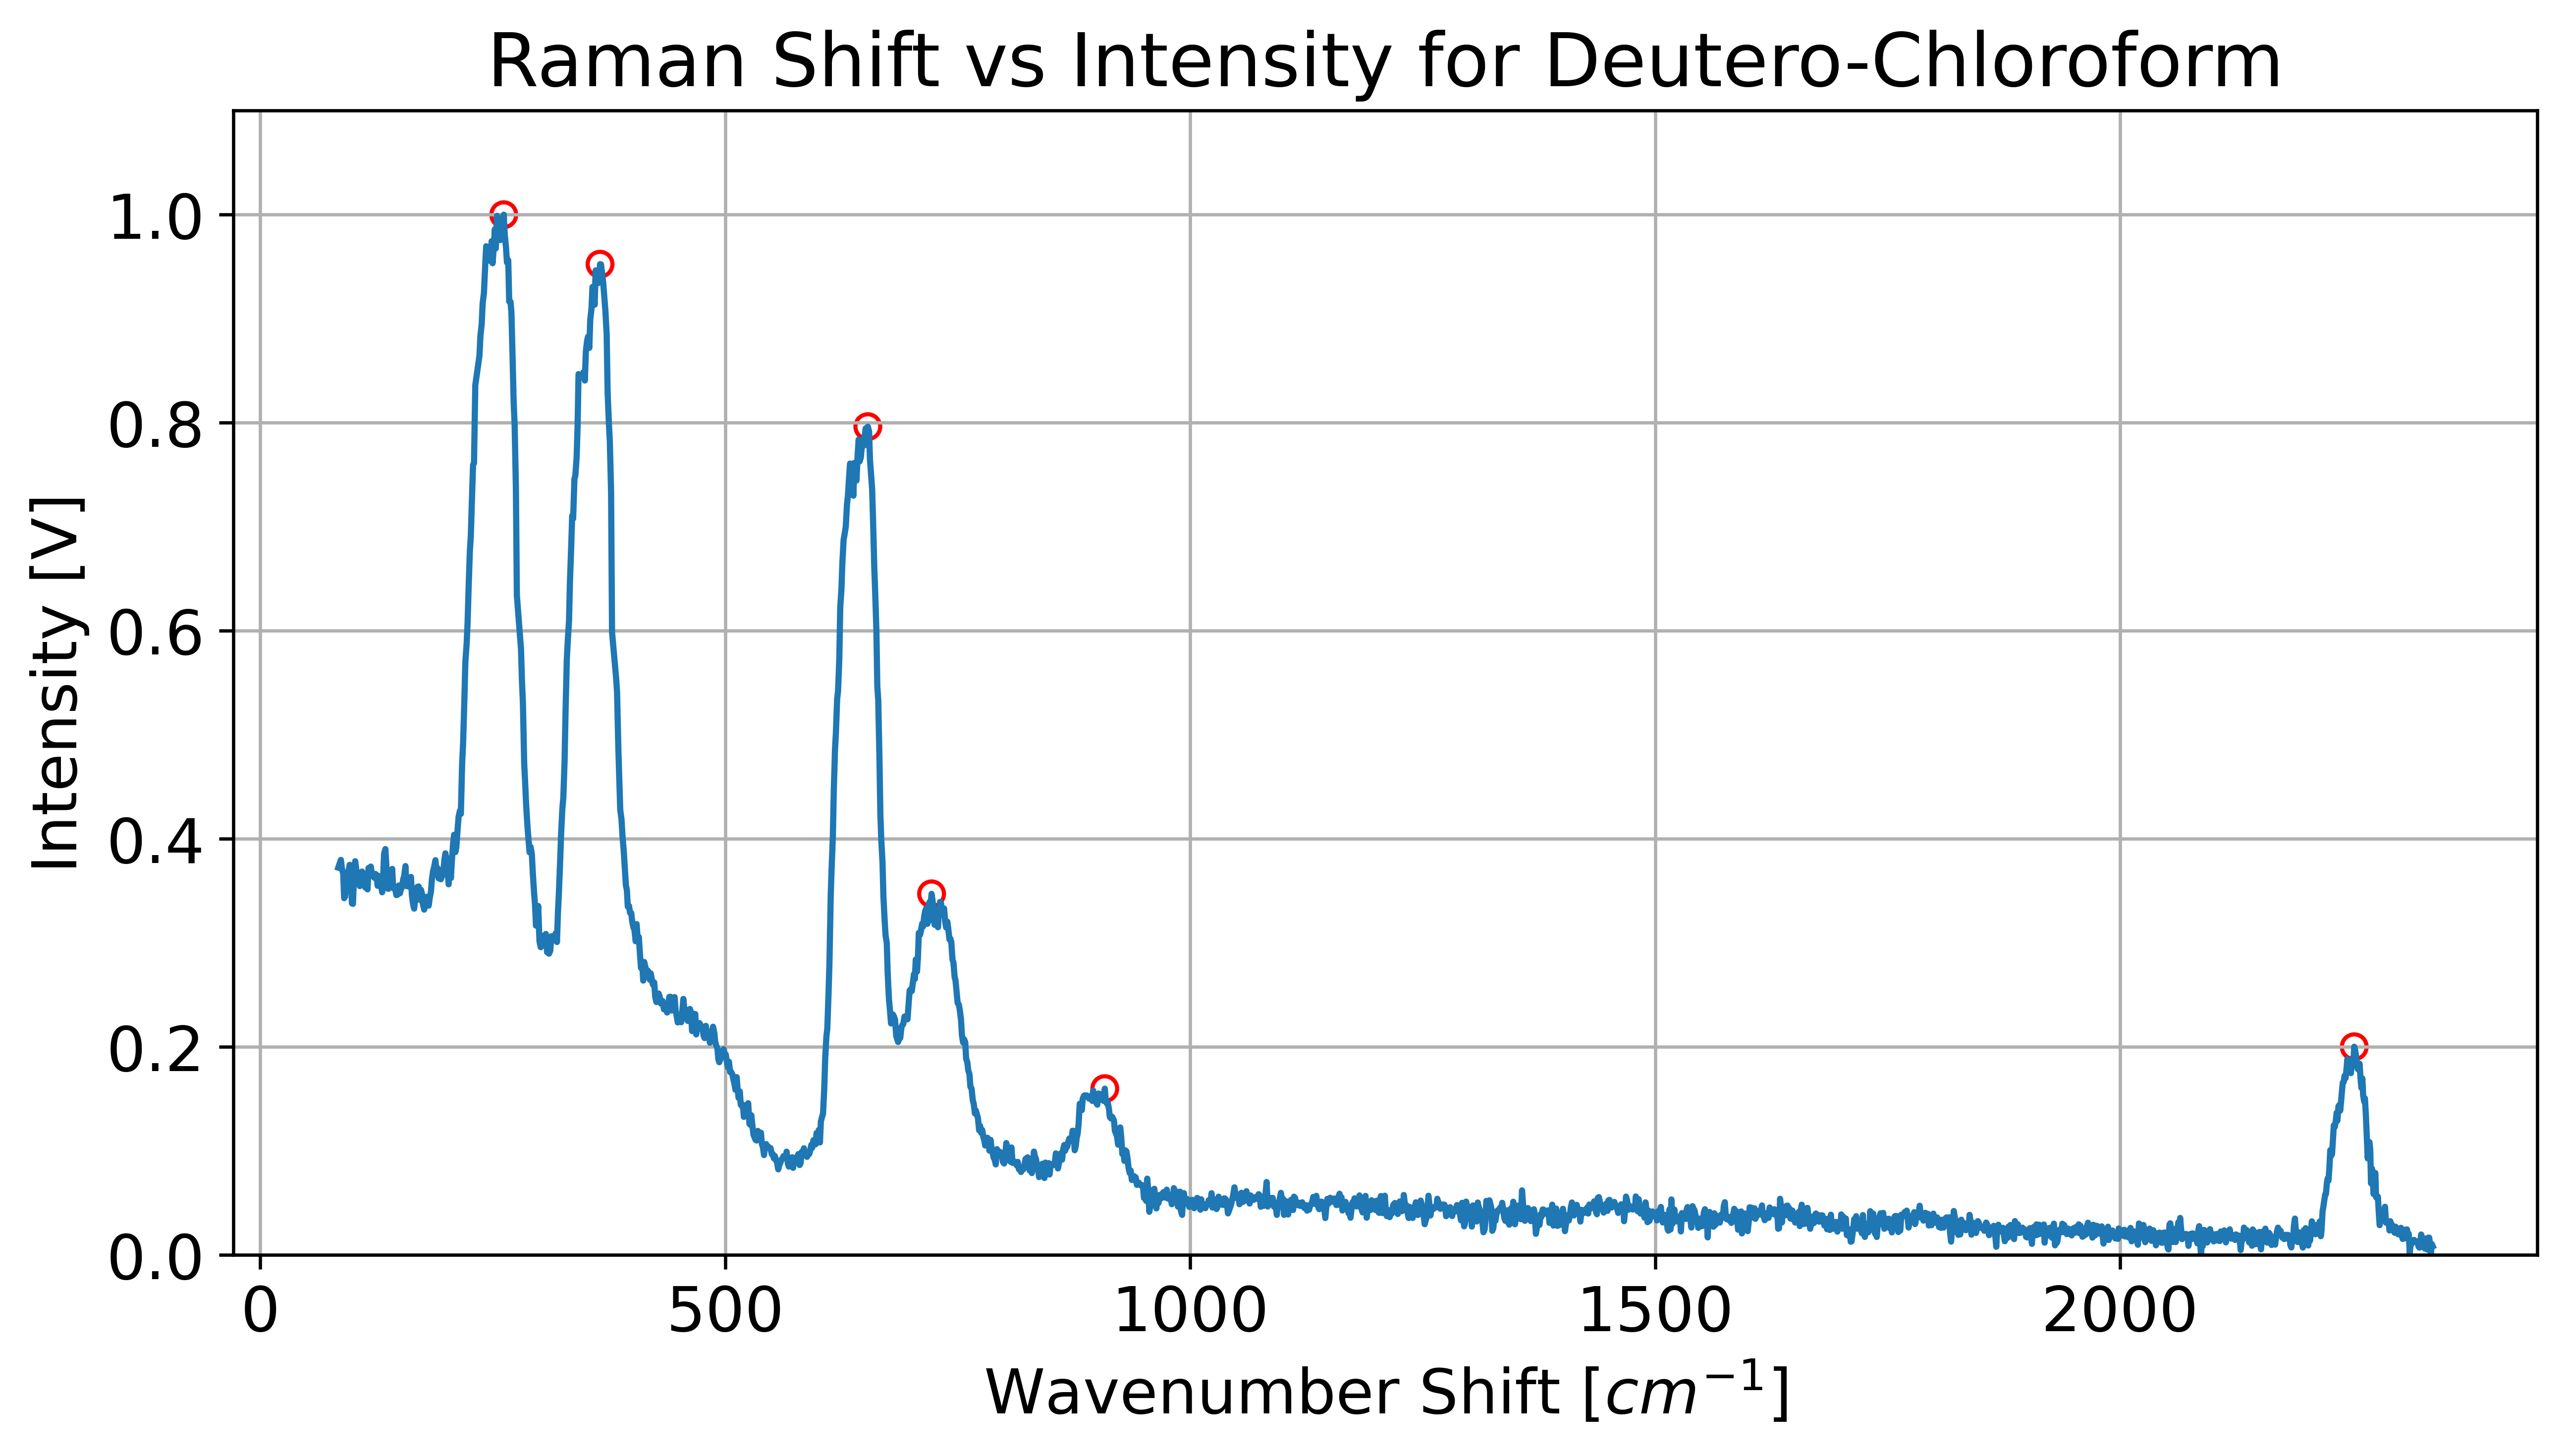

In [14]:
"""Plotting the Data"""

plt.plot(wavenumbers, spectrum)
plt.scatter(peak_wavenumbers, peak_spectrum, color="red", facecolors="none")
# plt.hlines(peak_spectrum/2, peak_wavenumbers - wavenumber_width, peak_wavenumbers + wavenumber_width, linestyles='dashed', color='green')
plt.xlabel("Wavenumber Shift $[cm^{-1}]$")
plt.ylabel("Intensity [V]")
# plt.xticks(ticks=np.arange(-800, 800, 100))
plt.ylim(0, 1.1)
plt.grid()

plt.title(f"Raman Shift vs Intensity for {species}")
# plt.annotate(f'$\lambda_{{end}}$ = {end_wavelength} A$\degree$', xy=(0.75, 0.97), xycoords='axes fraction', fontsize=14, verticalalignment='top')
# plt.annotate(f'rate = {scan_rate} A$\degree$/s', xy=(0.75, 0.92), xycoords='axes fraction', fontsize=14, verticalalignment='top')
# plt.annotate(f'width = {width} micron', xy=(0.75, 0.87), xycoords='axes fraction', fontsize=14, verticalalignment='top')
# plt.annotate(f'angle = {angle}$\degree$', xy=(0.75, 0.82), xycoords='axes fraction', fontsize=14, verticalalignment='top')

plt.savefig(f"Plots/draft.png")
plt.show()

In [15]:
""" Saving the repeat CCl4 Data """

# with open(f'SulphurFinal.txt',"w") as f:
#     f.write('unconvertedTime, unconvertedIntensity\n')
#     for (a, b) in zip(wavenumbers, spectrum):
#         f.write("{0},{1}\n".format(a, b))

' Saving the repeat CCl4 Data '